# **AGE PREDICTION**

Lorenzo Conte - 5206353 \
Alessia Guarneri - 5205957 \
Riccardo Mira - 5205744


The dataset we used contains 23,813 images depicting individuals ranging in age from 1 to 116 years.\
 The images exhibit various characteristics such as different poses or facial expressions, varying brightness, and resolution. \
The images are 200 x 200 pixels in size.


Source : https://www.kaggle.com/datasets/roshan81/ageutk


**Aim**: The project aims to predict age based on images depicting faces of individuals of different ages.



## Import libraries and install d2l package

In [ ]:
!pip install torch torchvision
!pip install d2l==1.0.0a1.post0
import torch
from torchvision import transforms, datasets
from torch.utils import data
from torch import nn
from d2l import torch as d2l
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil
import random
d2l.use_svg_display()
%matplotlib inline

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# directory
%cd /content/drive/MyDrive/Colab\ Notebooks/Age

/content/drive/MyDrive/Colab Notebooks/Age


In [ ]:
# unzip the file
!unzip age.zip

## Data preparation

In [ ]:
# dash board
directory_path = '/content/drive/MyDrive/Colab Notebooks/Age/UTKFace/UTKFace/UTKFace'
limbo_path = '/content/drive/MyDrive/Colab Notebooks/Age/UTKFace/UTKFace/Limbo'
# Limbo is the folder where we move all the images we have decide to remove from the original dataset
test_path = '/content/drive/MyDrive/Colab Notebooks/Age/UTKFace/UTKFace/Test'

### Folders

With the following codes, we have organized the images into folders. This operation was possible because the age of the person depicted in the image was present in the name of the image (specifically, the age corresponded to the first number that constituted the name). \
 Each created folder is named after the age of the individuals in the images it contains.

In [ ]:
# folders

image_files = os.listdir(directory_path)


for image_file in image_files:
    age_label = image_file.split('_')[0]
    age_folder = os.path.join(directory_path, age_label)

    if not os.path.exists(age_folder):
        os.makedirs(age_folder)

    # Move the images in the corresponding folder
    source_path = os.path.join(directory_path, image_file)
    destination_path = os.path.join(age_folder, image_file)
    os.rename(source_path, destination_path)

In [ ]:
# List of the folders
folders = [folder for folder in os.listdir(directory_path) if os.path.isdir(os.path.join(directory_path, folder))]

print(folders)

['001', '002', '003', '004', '005', '006', '007', '008', '009', '010', '011', '012', '013', '014', '015', '016', '017', '018', '019', '020', '021', '022', '023', '024', '025', '026', '027', '028', '029', '030', '031', '032', '033', '034', '035', '036', '037', '038', '039', '040', '041', '042', '043', '044', '045', '046', '047', '048', '049', '050', '051', '052', '053', '054', '055', '056', '057', '058', '059', '060', '061', '062', '063', '064', '065', '066', '067', '068', '069']


In [ ]:
# Sort the folders
folders.sort(key=lambda x: int(x))

print(folders)

['001', '002', '003', '004', '005', '006', '007', '008', '009', '010', '011', '012', '013', '014', '015', '016', '017', '018', '019', '020', '021', '022', '023', '024', '025', '026', '027', '028', '029', '030', '031', '032', '033', '034', '035', '036', '037', '038', '039', '040', '041', '042', '043', '044', '045', '046', '047', '048', '049', '050', '051', '052', '053', '054', '055', '056', '057', '058', '059', '060', '061', '062', '063', '064', '065', '066', '067', '068', '069', '070', '071', '072', '073', '074', '075', '076', '077', '078', '079', '080', '081', '082', '083', '084', '085', '086', '087', '088', '089', '090', '091', '092', '093', '094', '095', '096', '097', '098', '099', '100', '101', '102', '103', '104']


In [ ]:
# Rename the folders
for i, folder in enumerate(folders):
    old_path = os.path.join(directory_path, folder)
    new_folder_name = f"{i + 1:03d}"
    new_path = os.path.join(directory_path, new_folder_name)
    os.rename(old_path, new_path)

We have decided to use the three digits format for naming the different folders because of the way of ordering the folders used by the Google Drive system.

In [ ]:
new_folders = [folder for folder in os.listdir(directory_path) if os.path.isdir(os.path.join(directory_path, folder))]
print("Cartelle ordinate:", new_folders)

Cartelle ordinate: ['001', '002', '003', '004', '005', '006', '007', '008', '009', '010', '011', '012', '013', '014', '015', '016', '017', '018', '019', '020', '021', '022', '023', '024', '025', '026', '027', '028', '029', '030', '031', '032', '033', '034', '035', '036', '037', '038', '039', '040', '041', '042', '043', '044', '045', '046', '047', '048', '049', '050', '051', '052', '053', '054', '055', '056', '057', '058', '059', '060', '061', '062', '063', '064', '065', '066', '067', '068', '069', '070', '071', '072', '073', '074', '075', '076', '077', '078', '079', '080', '081', '082', '083', '084', '085', '086', '087', '088', '089', '090', '091', '092', '093', '094', '095', '096', '097', '098', '099', '100', '101', '102', '103', '104']


In [ ]:
# Sort labels
sorted_folders = sorted(new_folders)
print(sorted_folders)

['001', '002', '003', '004', '005', '006', '007', '008', '009', '010', '011', '012', '013', '014', '015', '016', '017', '018', '019', '020', '021', '022', '023', '024', '025', '026', '027', '028', '029', '030', '031', '032', '033', '034', '035', '036', '037', '038', '039', '040', '041', '042', '043', '044', '045', '046', '047', '048', '049', '050', '051', '052', '053', '054', '055', '056', '057', '058', '059', '060', '061', '062', '063', '064', '065', '066', '067', '068', '069', '070', '071', '072', '073', '074', '075', '076', '077', '078', '079', '080', '081', '082', '083', '084', '085', '086', '087', '088', '089', '090', '091', '092', '093', '094', '095', '096', '097', '098', '099', '100', '101', '102', '103', '104']


In [ ]:
# Number of image per folder

label_name = []
num_image_folder = []

for j in sorted_folders:
    cartella = os.path.join(directory_path, j)
    if os.path.isdir(cartella):
        label_name.append(j)
        num_file = len(os.listdir(cartella))
        num_image_folder.append(num_file)
        print(f'Cartella: {cartella}, Numero di file: {num_file}')

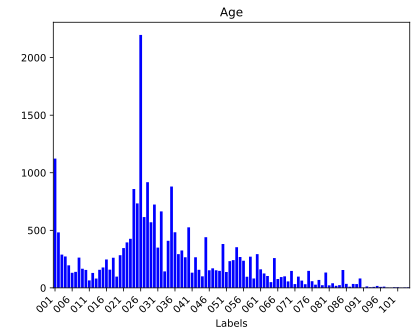

In [ ]:
# plot
plt.bar(label_name, num_image_folder, color = "Blue")
plt.xlabel('Labels')
plt.ylabel(' ')
plt.title('Age')
plt.xticks(np.arange(0, 116, 5),rotation=45, ha='right')
plt.xlim(-0.5, len(label_name) - 0.5)
plt.show()

plt.savefig('Age iniziale.png')

From the above image, it is evident that the classes are not balanced. It is quite clear that the first class and a class between 25 and 30 (from the graph is not clear the precise one) have a significantly higher number of images compared to all others. There are other classes that, on the contrary, have a number of images within a range of 850 to 930. Another important thing is that from the graph we are able to see less than 116 classes that is because not all the years are represented in the dataset.

Furthermore, many classes have a limited number of images (less than 100 images). We observed that the majority of these classes are concentrated to the right of class 65.

In [ ]:
# dictionary where each key is a class and its corresponding value is the number of image.
d = dict(zip(label_name, num_image_folder))
print(d)


{'001': 1123, '002': 482, '003': 289, '004': 273, '005': 196, '006': 131, '007': 139, '008': 263, '009': 166, '010': 156, '011': 65, '012': 130, '013': 81, '014': 157, '015': 177, '016': 247, '017': 158, '018': 262, '019': 98, '020': 284, '021': 346, '022': 395, '023': 426, '024': 859, '025': 734, '026': 2197, '027': 615, '028': 918, '029': 570, '030': 724, '031': 350, '032': 664, '033': 143, '034': 409, '035': 880, '036': 483, '037': 293, '038': 325, '039': 266, '040': 526, '041': 132, '042': 266, '043': 157, '044': 100, '045': 440, '046': 153, '047': 170, '048': 153, '049': 148, '050': 381, '051': 138, '052': 232, '053': 241, '054': 353, '055': 268, '056': 236, '057': 97, '058': 271, '059': 82, '060': 293, '061': 161, '062': 125, '063': 103, '064': 50, '065': 259, '066': 77, '067': 94, '068': 100, '069': 56, '070': 147, '071': 33, '072': 98, '073': 63, '074': 32, '075': 148, '076': 58, '077': 28, '078': 69, '079': 23, '080': 133, '081': 22, '082': 40, '083': 18, '084': 24, '085': 155

In [ ]:
limit_num = 920
l_folder_max = []
l_num_image = []
for i in d:
  if d[i] > limit_num:
    l_folder_max.append(i)
    l_num_image.append(d[i]-limit_num)


#print(l_folder_max)
#print(l_num_image)


With the above code, we were able to accurately identify which classes have a number of images greater than 920 (a threshold we set based on the previous graph).\
 The classes in question are 2: class 1 and class 26.

In [ ]:
# We randomly moved the excess elements from classes 1 and 26

for fm in range(l_folder_max):
  source_folder = directory_path + "/" + l_folder_max[fm]
  destination_folder = limbo_path + "/" + l_folder_max[fm] + "_l"

  os.makedirs(destination_folder, exist_ok=True)
  all_files = os.listdir(source_folder)
  files_to_move = random.sample(all_files, l_num_image[fm])

  for file_name in files_to_move:
      source_path = os.path.join(source_folder, file_name)
      destination_path = os.path.join(destination_folder, file_name)
      shutil.move(source_path, destination_path)

We have decided that, since the classes after 70 consist of a significantly lower number of images compared to the others, they will not be used by our model.

In [ ]:
# We have moved all the folder after 70

source_folder = directory_path
destination_folder = limbo_path

os.makedirs(destination_folder, exist_ok=True)

files_to_move = os.listdir(source_folder)[69:]
print(files_to_move)

for file_name in files_to_move:
    source_path = os.path.join(source_folder, file_name)
    destination_path = os.path.join(destination_folder, file_name)
    shutil.move(source_path, destination_path)

['070', '071', '072', '073', '074', '075', '076', '077', '078', '079', '080', '081', '082', '083', '084', '085', '086', '087', '088', '089', '090', '091', '092', '093', '094', '095', '096', '097', '098', '099', '100', '101', '102', '103', '104']


In [ ]:
# Update number of image per folder
label_name = []
num_image_folder = []

for j in sorted_folders:
    cartella = os.path.join(directory_path, j)
    if os.path.isdir(cartella):
        label_name.append(j)
        num_file = len(os.listdir(cartella))
        num_image_folder.append(num_file)
        print(f'Cartella: {cartella}, Numero di file: {num_file}')
# the code above specify how many images we have per year


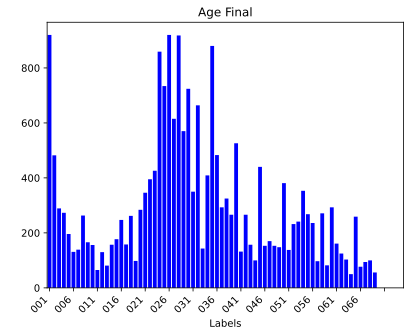

In [ ]:
# plot after updates
plt.bar(label_name, num_image_folder, color = "Blue")
plt.xlabel('Labels')
plt.ylabel(' ')
plt.title('Age Final')
plt.xticks(np.arange(0, 116, 5),rotation=45, ha='right')
plt.xlim(-0.5, len(label_name) + 5)
plt.show()

plt.savefig('Age Final.png')

From this graph we can see that not all ages are reprented in a uniform way, but all of them are sufficiently represented.

## TRAIN AND TEST SET

We decide to split the images into a training and a test set using correspondingly 80% for the trainig set and 20% for the test set. In particular, we remove the 20% from each age folder of the original dataset using the following code.

In [ ]:
for i in range(1,70):
  if i < 10:
    prefix = '00'
  else:
    prefix = '0'

  source_folder = directory_path + "/" + prefix + str(i) # source path
  destination_folder = test_path + "/" + prefix + str(i) # destination path

  os.makedirs(destination_folder, exist_ok=True)  # if the folder doesn't exist this code will create it

  all_files = os.listdir(source_folder) # images per folder
  n = len(all_files) # number of images per folder
  num = int(0.2 * n) # compute the 20% of the whole amount of images per folder
  files_to_move = random.sample(all_files, num)
  # we move randomly the images because they are arranged in a specific order given by the sex and the etnicity of the person
  for file_name in files_to_move:
    source_path = os.path.join(source_folder, file_name)
    destination_path = os.path.join(destination_folder, file_name)
    shutil.move(source_path, destination_path)


## DATASET

In [ ]:
data_augmentation = transforms.Compose([
        transforms.Resize((224,224)), # this is the suggested size for AlexNet the model we are going to use
        transforms.RandomAdjustSharpness(2),
        transforms.ColorJitter(brightness=0.25,contrast=0,saturation=0,hue=0),
        # the previous tranformation allow the brightness to change randomly of +25% or -25%
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])

data_augmentation1 = trasforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In this data augmentation part we have done some transformation in order to make the images more appropriate for the training part.
In particular we have: resized, resharpened, change the brightness, transformed to tensors and normalized the images. \
In our case was particularly necessary the normalization of the input tensors, otherwise the loss function would have quickly diverged.

In [ ]:
# image folder
train_set = datasets.ImageFolder(root=directory_path,
                                           transform=data_augmentation)
test_set = datasets.ImageFolder(root=test_path,
                                           transform=data_augmentation1)

In [ ]:
# data loader
train_iter = data.DataLoader(train_set,batch_size=128, shuffle=True,
                                             num_workers=4)
test_iter = data.DataLoader(test_set,batch_size=128, shuffle=True,
                                             num_workers=4)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
len(train_set), len(test_set)

(16750, 4156)

In [ ]:
data_iter = iter(train_iter)

In [ ]:
X, y = next(data_iter)  # one minibatch
print(train_set[0][0].shape)
print(X.shape)
print(X[0].shape)
print(y.shape)
print(y[0])
print(torch.is_tensor(X[0]))

torch.Size([3, 224, 224])
torch.Size([128, 3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([128])
tensor(64)
True


Text(0.5, 1.0, 'Age: 64')

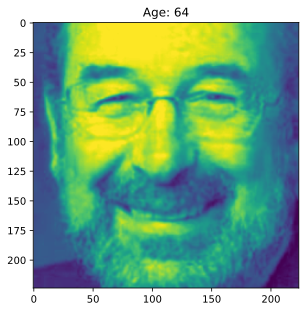

In [ ]:
_ = plt.imshow(np.asarray(X[0][0]))
plt.title(f"Age: {y[0]}")

This is an example of one of the images that are in the dataset togheter with the original label.\
 As said before our goal for this project is to predict the age (label) of the person in the image given the image itself.

## MODEL

In order to reach our goal we have tried different model such that LeNet, GoogLeNet and ResNet (all of them with some small changes from the original one). At the end the best one was the following one, in particular, a derivation of the AlexNet model.  

In [ ]:
net = nn.Sequential(
    nn.Conv2d(3, 96, kernel_size=11, stride=4, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.Conv2d(96, 256, kernel_size=5, padding=2),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.Conv2d(256, 384, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.Conv2d(384, 384, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.Conv2d(384, 256, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.Flatten(),
    nn.Linear(6400, 4096),
    nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(4096, 256),
    nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(256, 1),
    nn.Sigmoid()
    )

In [ ]:
X = torch.rand(size=(1, 3, 224, 224))
for layer in net:
    X = layer(X)
    print(layer.__class__.__name__,'output shape:\t', X.shape)

Conv2d output shape:	 torch.Size([1, 96, 54, 54])
ReLU output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape:	 torch.Size([1, 96, 26, 26])
Conv2d output shape:	 torch.Size([1, 256, 26, 26])
ReLU output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d output shape:	 torch.Size([1, 256, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 256, 12, 12])
ReLU output shape:	 torch.Size([1, 256, 12, 12])
MaxPool2d output shape:	 torch.Size([1, 256, 5, 5])
Flatten output shape:	 torch.Size([1, 6400])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 256])
ReLU output shape:	 torch.Size([1, 256])
Dropout output shape:	 torch.Size([1, 256])
Linear output shape:	 torch.Size([1, 1]

This model is the best one for our project. This is a AlexNet model with some modification. The original AlexNet consists of eight layers: five convolutional layers, two fully connected hidden layers, and one fully connected output layer. \
The changes we implement to the net are mainly two:


*   change the activation function of the output layer from linear to Sigmoid. Doing so we are then able to obtain a value between 0 and 69, that are the number of classes we have, multiplying the output by 69.
*   change the number of nodes of the second hidden layer from 4096 to 256,in this way we were able to improve the final result of the model.  



In [ ]:
def train_prova(net, train_iter, test_iter, num_epochs, lr, device=None):
    if device is None:
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    def init_weights(m):
        if type(m) == nn.Linear or type(m) == nn.Conv2d:
            nn.init.xavier_uniform_(m.weight)

    net.apply(init_weights)
    print('training on', device)

    net.to(device)
    optimizer = torch.optim.SGD(net.parameters(), lr=lr)
    loss = nn.MSELoss()
    animator = d2l.Animator(xlabel='epoch', xlim=[1, num_epochs],
                            legend=['train loss', 'test loss'])
    timer, num_batches = d2l.Timer(), len(train_iter)
    valore_minimo = 0
    valore_massimo = 69

    for epoch in range(num_epochs):
        train_metric = d2l.Accumulator(2)  # Initialize train accumulator for each epoch
        test_metric = d2l.Accumulator(2)  # Initialize test accumulator for each epoch
        net.train()
        print(f'siamo alla {epoch + 1} epoch (training)')

        for i, (X, y) in enumerate(train_iter):
            optimizer.zero_grad()
            X, y = X.to(device), y.to(device)
            y_hat = net(X)
            y = y.view(-1, 1).float()
            y_real = y_hat * (valore_massimo - valore_minimo) + valore_minimo
            l = loss(y_real, y)
            print(f'training - epoch {epoch+1}, batch {i+1}, loss: {l.item():.3f}')
            l.backward()
            optimizer.step()

            with torch.no_grad():
                train_metric.add(l * X.shape[0], X.shape[0])

        train_loss = train_metric[0] / train_metric[1]
        animator.add(epoch + 1, (train_loss, None))

        net.eval()  # Switch to evaluation mode for test set
        print(f'siamo alla {epoch + 1} epoch (testing)')

        for i, (X, y) in enumerate(test_iter):
            X, y = X.to(device), y.to(device)
            y_hat = net(X)
            y = y.view(-1, 1).float()
            y_real = y_hat * (valore_massimo - valore_minimo) + valore_minimo
            l = loss(y_real, y)
            print(f'testing - epoch {epoch+1}, batch {i+1}, loss: {l.item():.3f}')

            with torch.no_grad():
                test_metric.add(l * X.shape[0], X.shape[0])

        test_loss = test_metric[0] / test_metric[1]
        animator.add(epoch + 1, (None, test_loss))

    print(f'Final train loss: {train_loss:.3f}, Final test loss: {test_loss:.3f}')

As the loss function we use the Mean Squared Error: $$\frac{1}{n}\sum_{i=1}^{n}(Y_i-\hat{Y_i})^2$$ \
Where $n$ is the size of the batch, $Y_i$ are the true labels and $\hat{Y_i}$ are the predicted one. This is also the metric we used in order to evaluate the performance of our model.\
 To better understand the result we have to take the square root of the MSE and interpret it as the average error in predicting the true age from the image.

Final train loss: 65.364, Final test loss: 72.343


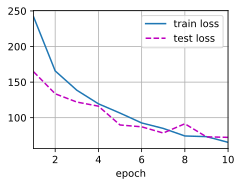

In [ ]:
lr, num_epochs = 0.0001, 10
train_prova(net, train_iter, test_iter, num_epochs, lr, device=torch.device("cuda" if torch.cuda.is_available() else "cpu"))


As we can see from the graph the loss decreases until reaches a value of 64. We can see that it's not flatten when it reaches this value, so it let us think that with some more epochs the model could have been improved a bit more, but in that case there could have been overfitting problems.

# Prediction

In [ ]:
torch.save(net, 'alexnetage')

In [ ]:
model = torch.load('alexnetage')

Now we have create the predictions of the test part for the first bach and then show them.

In [ ]:
for x, y in test_iter:
  break
x , y = x.cuda(), y.cuda()
pred = model(x) * 69

In [ ]:
# Predictions

prediction = pred
# round the elements and transform them to int
rounded_pred =prediction.round().to(torch.int)
print(rounded_pred)

tensor([[41],
        [30],
        [21],
        [41],
        [19],
        [ 4],
        [57],
        [35],
        [16],
        [28],
        [26],
        [55],
        [43],
        [56],
        [32],
        [45],
        [20],
        [30],
        [32],
        [24],
        [39],
        [13],
        [26],
        [59],
        [35],
        [49],
        [44],
        [40],
        [30],
        [50],
        [ 1],
        [29],
        [ 0],
        [32],
        [35],
        [30],
        [29],
        [25],
        [25],
        [30],
        [34],
        [46],
        [34],
        [38],
        [ 9],
        [39],
        [52],
        [57],
        [33],
        [ 7],
        [41],
        [54],
        [15],
        [36],
        [ 2],
        [39],
        [58],
        [67],
        [33],
        [37],
        [26],
        [ 1],
        [48],
        [62],
        [40],
        [ 0],
        [22],
        [ 8],
        [48],
        [36],
        [36],
      

In [ ]:
# True labels
y

tensor([31, 24, 22, 28, 27,  3, 54, 34, 21, 34, 11, 57, 33, 57, 25, 52, 26, 31,
        29, 17, 25,  7, 15, 52, 38, 44, 51, 31, 41, 59,  0, 48,  0, 27, 33, 28,
        31, 31, 22, 37, 34, 34, 40, 28,  0, 45, 29, 56, 41,  3, 27, 62,  6, 26,
         0, 34, 51, 39, 35, 40, 27,  2, 44, 50, 64,  0, 27,  6, 34, 30, 39, 17,
         7, 47, 29, 23,  0,  0, 25, 44, 35, 29, 15,  1, 53, 24, 23, 34,  0,  1,
        23, 51, 54, 22,  5,  8, 24,  9, 23, 27, 30, 66, 30, 50, 18, 31, 44, 60,
        17, 21, 48, 30, 66,  8, 41, 35, 29, 21, 65,  4, 41, 31, 20, 57, 14, 22,
         4, 39], device='cuda:0')

At this point we have plot 10 images with the true label e the predicted one.

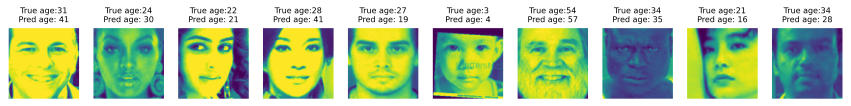

In [ ]:
# Plot
fig, axes = plt.subplots(1,10, figsize=(15,5))

for i in range(10):
    image_array = np.asarray(x.cpu()[i][0])
    axes[i].imshow(image_array)
    axes[i].axis('off')
    axes[i].set_title(f"True age:{y[i]}\nPred age: {rounded_pred[i][0]}", fontsize=8)


plt.show()

# Conclusion

Our initial goal was to predict the age of individuals based on images. We experimented with various well-known models (GoogLeNet, ResNet, AlexNet) and some custom-built models, but the one that yielded the best results was AlexNet.\
Using AlexNet as a starting point, we made two modifications:

1.   We adjusted the number of nodes in the last layers, specifically reducing the output layer to 1 node and decreasing the nodes in the second hidden layer.
2.   As the activation function for the last layer, we used a Sigmoid function to obtain results between 0 and 1, which were then rescaled to the range corresponding to the number of classes (0 - 69). \

The final result of the loss function is 64.187; to better interpret the result, applying the square root yields an average error of approximately 8 years. These outcomes were made possible by some transformations applied to the initial images. We used all three RGB channels from the outset to gather more information, and the use of a low learning rate (higher learning rates caused convergence issues in the loss function) contributed to our satisfaction with the achieved results.


